# Statistical Static Timing Analysis via Modern Optimization Lens

## Implementation Section

We have prototyped the formulations in [CVXPY](https://www.cvxpy.org/). For benchmarking
purposes, we have rewritten the formulations of the integer programs in [Mosek’s matrix-oriented API](https://docs.mosek.com/latest/pythonapi/index.html). In this Jupyter notebook, you can find the results that ran on Mosek 10.0 on Intel(R) Core(TM) i9-9880H CPU @ 2.30GHz with 16GB RAM.

In [1]:
import src.timing.infiniteLadder as infiniteLadder
import numpy as np
from src.timing.ScalingAlgorithms import *
import src.utility_tools.Plotter as Plotter
import sys
import subprocess

%load_ext autoreload
%autoreload 2

***
### GP model with fixed number of gates

Fig. 5 in the paper demonstrates the scalability of the reformulated GP on a ladder
of maxima and convolutions, parameterized by the number of bins per gate.
Notice that the numbers of cones (blue line) and variables (orange line) are
quadratic in the number of bins. At the same time, relative error decreases with the
number of bins, as expected. Error of the standard deviation is indicated by orange line and mean error is indicated by
blue line in the third subplot.

In [2]:
# set parameters
numberOfIterations=8
step=15
numberOfGates=4
numBinsStart=20
interval=(-4, 25)

xs = [numberOfIterations, step, numberOfGates, numBinsStart, interval[0], interval[1]]
args = ' '.join(str(x) for x in xs)

In [3]:
# Uncomment to run on your own machine - takes 2 minutes on specified hardware
p = subprocess.run("python3.9 ../src/timing/ScalingAlgorithms.py GP_bins " + args + " > ../inputs_outputs/logBins.txt", shell=True)


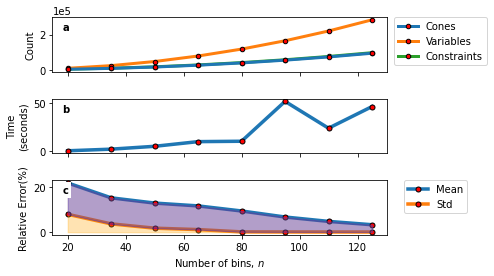

In [4]:
Plotter.plotPresolve("../inputs_outputs/logBins.txt", bins=True)

***
### GP model with fixed number of bins

The results on a ladder of maximums and convolutions parameterized
by the depth of the ladder are shown in Fig. 5 in the paper. Notice that the numbers of
cones (blue line) and variables (orange line) are linear in the depth of the
ladder. At the same time, the relative error
increases, which may be due to the fixed number of bins utilized. Relative error of the standard deviation is indicated by orange line and relative error of the mean is indicated by
blue line in the third subplot.

In [8]:
# set parameters
numberOfIterations=6
step=2
numberOfBins=60
numGatesStart=1
interval=(-4, 25)

xs = [numberOfIterations, step, numberOfBins, numGatesStart, interval[0], interval[1]]
args = ' '.join(str(x) for x in xs)

In [9]:
# Uncomment to run on your own machine - takes 2 minutes on specified hardware
p = subprocess.run("python3.9 ../src/timing/ScalingAlgorithms.py GP_gates " + args + " > ../inputs_outputs/logGates.txt", shell=True)


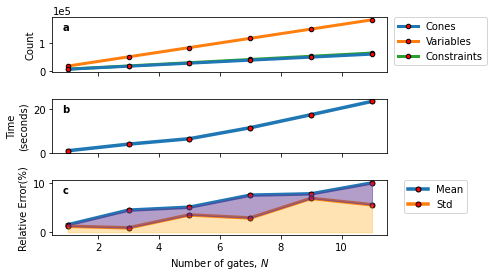

In [10]:
Plotter.plotPresolve("../inputs_outputs/logGates.txt", bins=False)

***
### MIP model - Comparison

Comparison of 3 methods of the SSTA realization. The methods are
tested on a “ladder” of maximums and convolutions. The blue line indicates the original method (ORIG), the orange line indicates a method with symmetry-breaking
constraints (SBC) and the green line indicates a method with symmetry-breaking constraints and a three-term multiplication model (SBC+TTM). One can see that the relaxed methods have much better MIP gap. However, neither of them scale well.

In [11]:
# set parameters 
numberOfIterations=4
step=2
numberOfBins=12
numGatesStart=1
numberOfUnaries=12
interval=(-4, 25)

In [12]:
       # test integer program with and without relaxations - takes 10 minutes
TRI = False
Constr = False
res1 = AlgorithmsScaling_MOSEK(numberOfIterations=numberOfIterations, step=step, numberOfBins=numberOfBins,
                      numberOfGatesStart=numGatesStart, interval=interval, numberOfUnaries=numberOfUnaries,
                             TRI=TRI, Constr=Constr)

TRI = False
Constr = True
res2 = AlgorithmsScaling_MOSEK(numberOfIterations=numberOfIterations, step=step, numberOfBins=numberOfBins,
                      numberOfGatesStart=numGatesStart, interval=interval, numberOfUnaries=numberOfUnaries,
                             TRI=TRI, Constr=Constr)

TRI = True
Constr = True
res3 = AlgorithmsScaling_MOSEK(numberOfIterations=numberOfIterations, step=step, numberOfBins=numberOfBins,
                      numberOfGatesStart=numGatesStart, interval=interval, numberOfUnaries=numberOfUnaries,
                             TRI=TRI, Constr=Constr)


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : LO (linear optimization problem)
  Constraints            : 75192           
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 32688           
  Matrix variables       : 0               
  Integer variables      : 32688           

Optimizer started.
Mixed integer optimizer started.
Threads used: 8
Presolve started.
Presolve terminated. Time = 0.03, probing time =  0.00
Presolved problem: 79 variables, 183 constraints, 494 non-zeros
Presolved problem: 2 general integer, 77 binary, 0 continuous
Clique table size: 120
BRANCHES RELAXS   ACT_NDS  DEPTH    BEST_INT_OBJ         BEST_RELAX_OBJ       REL_GAP(%)  TIME  
0        0        1        0        -0.0000000000e+00    NA                   NA          0.1   
0        1        1        0        -0.0000000000e+

Clique table size: 1800
BRANCHES RELAXS   ACT_NDS  DEPTH    BEST_INT_OBJ         BEST_RELAX_OBJ       REL_GAP(%)  TIME  
0        0        1        0        -0.0000000000e+00    NA                   NA          0.7   
0        1        1        0        -0.0000000000e+00    4.7165027954e+01     4.72e+13    0.8   
Cut generation started.
0        1        1        0        -0.0000000000e+00    4.7165027954e+01     4.72e+13    0.9   
0        2        1        0        -0.0000000000e+00    3.1649997359e+01     3.16e+13    0.9   
0        3        1        0        -0.0000000000e+00    2.1464436045e+01     2.15e+13    0.9   
0        4        1        0        -0.0000000000e+00    1.7622685185e+01     1.76e+13    1.0   
0        5        1        0        -0.0000000000e+00    1.6000000000e+01     1.60e+13    1.0   
Cut generation terminated. Time = 0.06
0        7        1        0        1.0000000000e+01     1.6000000000e+01     60.00       1.0   
0        7        1        0        1.60

Clique table size: 45
BRANCHES RELAXS   ACT_NDS  DEPTH    BEST_INT_OBJ         BEST_RELAX_OBJ       REL_GAP(%)  TIME  
0        0        1        0        4.0000000000e+00     NA                   NA          0.1   
0        1        1        0        4.0000000000e+00     4.0000000000e+00     0.00e+00    0.1   
An optimal solution satisfying the relative gap tolerance of 1.00e+00(%) has been located.
The relative gap is 0.00e+00(%).
An optimal solution satisfying the absolute gap tolerance of 0.00e+00 has been located.
The absolute gap is 0.00e+00.
An optimal solution satisfying the relative gap tolerance of 1.00e+00(%) has been located.
The relative gap is 0.00e+00(%).
An optimal solution satisfying the absolute gap tolerance of 0.00e+00 has been located.
The absolute gap is 0.00e+00.

Objective of best integer solution : 4.000000000000e+00      
Best objective bound               : 4.000000000000e+00      
Initial feasible solution objective: -0.000000000000e+00     
Construct soluti

Mixed integer optimizer terminated. Time: 0.64

Optimizer terminated. Time: 0.67    


Integer solution solution summary
  Problem status  : PRIMAL_FEASIBLE
  Solution status : INTEGER_OPTIMAL
  Primal.  obj: 1.6000000000e+01    nrm: 1e+00    Viol.  con: 0e+00    var: 0e+00    itg: 0e+00  

                    Analyzing the problem

*** Structural report
                      Dimensions
                      Constraints   Variables     Matrix var.   Cones         ACC           DJC         
                      377280        162864        0             0             0             0

                      Constraint and bound types
                      Free          Lower         Upper         Ranged        Fixed       
        Constraints:  0             57480         319800        0             0           
          Variables:  0             0             0             162864        0           

                      Integer constraint types
                      Binary        Gene


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : LO (linear optimization problem)
  Constraints            : 13478832        
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 3371040         
  Matrix variables       : 0               
  Integer variables      : 3371040         

Optimizer started.
Mixed integer optimizer started.
Threads used: 8
Presolve started.
Presolve terminated. Time = 9.13, probing time =  0.04
Presolved problem: 1130 variables, 4170 constraints, 11458 non-zeros
Presolved problem: 0 general integer, 1130 binary, 0 continuous
Clique table size: 3136
BRANCHES RELAXS   ACT_NDS  DEPTH    BEST_INT_OBJ         BEST_RELAX_OBJ       REL_GAP(%)  TIME  
0        0        1        0        7.0000000000e+01     NA                   NA          21.3  
0        1        1        0        7.0000

The relative gap is 0.00e+00(%).
An optimal solution satisfying the absolute gap tolerance of 0.00e+00 has been located.
The absolute gap is 0.00e+00.

Objective of best integer solution : 2.750000000000e+02      
Best objective bound               : 2.750000000000e+02      
Initial feasible solution objective: -0.000000000000e+00     
Construct solution objective       : Not employed
User objective cut value           : Not employed
Number of cuts generated           : 0
Number of branches                 : 0
Number of relaxations solved       : 1
Number of interior point iterations: 32
Number of simplex iterations       : 0
Time spend presolving the root     : 46.83
Time spend optimizing the root     : 0.35
Mixed integer optimizer terminated. Time: 128.46

Optimizer terminated. Time: 132.63  


Integer solution solution summary
  Problem status  : PRIMAL_FEASIBLE
  Solution status : INTEGER_OPTIMAL
  Primal.  obj: 2.7500000000e+02    nrm: 2e+01    Viol.  con: 1e-14    var: 0e+00    i

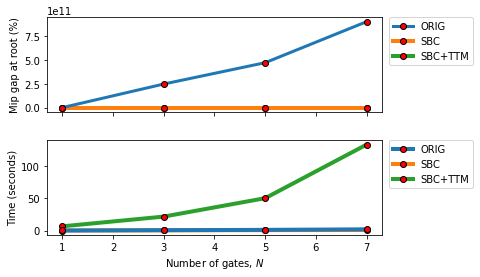

In [13]:
# Plot the results 
# - blue line indicates the unrelaxed problem
# - orange line indicates relaxed problem with symmetry breaking constraints
# - green line indicates the fully relaxed

Plotter.plotComparison(res1, res2, res3)

***
### Further experiments with SBC and SBC+TTM

Correctness of the BIP formulation can be seen in the following figues where the mean and standard deviation of the sink delay distribution is compared against the MC. Although the number of constraints and variables scale linearly with the number of gates, these numbers are huge, thus, this approach does not scale. For example, the numbers of
variables and constraints quickly reached the order of ∼ 106 for only 5 gates (Fig. 3 in the paper).

In [14]:
# set parameters
numberOfIterations=5
step=1
numberOfBins=25
numGatesStart=1
numberOfUnaries=20
interval=(-4, 25)

In [15]:
# test 1. relaxation (SBC)
TRI = False
Constr = True
res = AlgorithmsScaling_MOSEK(numberOfIterations=numberOfIterations, step=step, numberOfBins=numberOfBins,
                      numberOfGatesStart=numGatesStart, interval=interval, numberOfUnaries=numberOfUnaries,
                             TRI=TRI, Constr=Constr)

Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : LO (linear optimization problem)
  Constraints            : 891000          
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 382500          
  Matrix variables       : 0               
  Integer variables      : 382500          

Optimizer started.
Mixed integer optimizer started.
Threads used: 8
Presolve started.
Presolve terminated. Time = 0.52, probing time =  0.01
Presolved problem: 278 variables, 725 constraints, 1916 non-zeros
Presolved problem: 0 general integer, 278 binary, 0 continuous
Clique table size: 486
BRANCHES RELAXS   ACT_NDS  DEPTH    BEST_INT_OBJ         BEST_RELAX_OBJ       REL_GAP(%)  TIME  
0        0        1        0        1.3000000000e+01     NA                   NA          1.8   
0        1        1        0        1.3000000000

The relative gap is 0.00e+00(%).
An optimal solution satisfying the absolute gap tolerance of 0.00e+00 has been located.
The absolute gap is 0.00e+00.

Objective of best integer solution : 2.800000000000e+01      
Best objective bound               : 2.800000000000e+01      
Initial feasible solution objective: -0.000000000000e+00     
Construct solution objective       : Not employed
User objective cut value           : Not employed
Number of cuts generated           : 0
Number of branches                 : 0
Number of relaxations solved       : 1
Number of interior point iterations: 10
Number of simplex iterations       : 0
Time spend presolving the root     : 2.66
Time spend optimizing the root     : 0.03
Mixed integer optimizer terminated. Time: 8.00

Optimizer terminated. Time: 8.10    


Integer solution solution summary
  Problem status  : PRIMAL_FEASIBLE
  Solution status : INTEGER_OPTIMAL
  Primal.  obj: 2.8000000000e+01    nrm: 1e+00    Viol.  con: 0e+00    var: 0e+00    itg:

                      Free          Lower         Upper         Ranged        Fixed       
        Constraints:  0             654750        3800250       0             0           
          Variables:  0             0             0             1910500       0           

                      Integer constraint types
                      Binary        General     
                      1905191       5309        

                      Constraint matrix for the scalarized problem
                      Rows          Columns       Nzs           Density(%)  
                      4455000       1910500       11452500      1.35e-04    

*** Constraint matrix

*** Done analyzing the problem



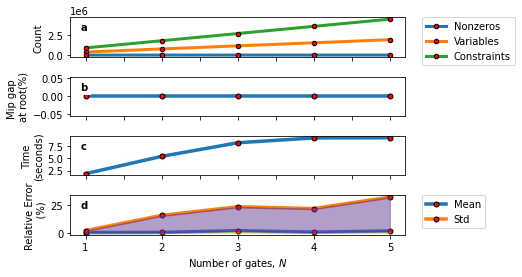

In [16]:
Plotter.plotNonzeros(res)

In [17]:
# set parameters for the fully relaxed problem
numberOfIterations=4
step=1
numberOfBins=10
numGatesStart=1
numberOfUnaries=10
interval=(-4, 25)

In [18]:
# test full relaxation - which does not scale so well (SBC+TTM)

TRI = True
Constr = True
resFullRelaxation = AlgorithmsScaling_MOSEK(numberOfIterations=numberOfIterations, step=step, numberOfBins=numberOfBins,
                      numberOfGatesStart=numGatesStart, interval=interval, numberOfUnaries=numberOfUnaries,
                             TRI=TRI, Constr=Constr)

Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : LO (linear optimization problem)
  Constraints            : 1540100         
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 385400          
  Matrix variables       : 0               
  Integer variables      : 385400          

Optimizer started.
Mixed integer optimizer started.
Threads used: 8
Presolve started.
Presolve terminated. Time = 0.56, probing time =  0.00
Presolved problem: 51 variables, 149 constraints, 407 non-zeros
Presolved problem: 0 general integer, 51 binary, 0 continuous
Clique table size: 111
BRANCHES RELAXS   ACT_NDS  DEPTH    BEST_INT_OBJ         BEST_RELAX_OBJ       REL_GAP(%)  TIME  
0        0        1        0        5.0000000000e+00     NA                   NA          2.1   
0        1        1        0        5.0000000000e+0

The relative gap is 0.00e+00(%).
An optimal solution satisfying the absolute gap tolerance of 0.00e+00 has been located.
The absolute gap is 0.00e+00.

Objective of best integer solution : 2.000000000000e+01      
Best objective bound               : 2.000000000000e+01      
Initial feasible solution objective: -0.000000000000e+00     
Construct solution objective       : Not employed
User objective cut value           : Not employed
Number of cuts generated           : 0
Number of branches                 : 0
Number of relaxations solved       : 1
Number of interior point iterations: 9
Number of simplex iterations       : 0
Time spend presolving the root     : 2.97
Time spend optimizing the root     : 0.01
Mixed integer optimizer terminated. Time: 6.97

Optimizer terminated. Time: 7.07    


Integer solution solution summary
  Problem status  : PRIMAL_FEASIBLE
  Solution status : INTEGER_OPTIMAL
  Primal.  obj: 2.0000000000e+01    nrm: 2e+00    Viol.  con: 0e+00    var: 0e+00    itg: 

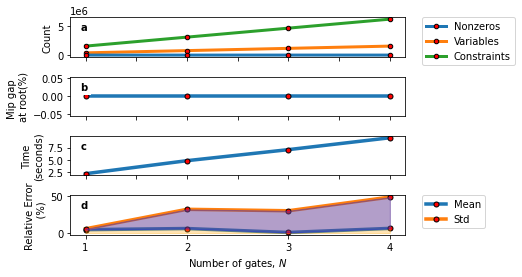

In [19]:
Plotter.plotNonzeros(resFullRelaxation)